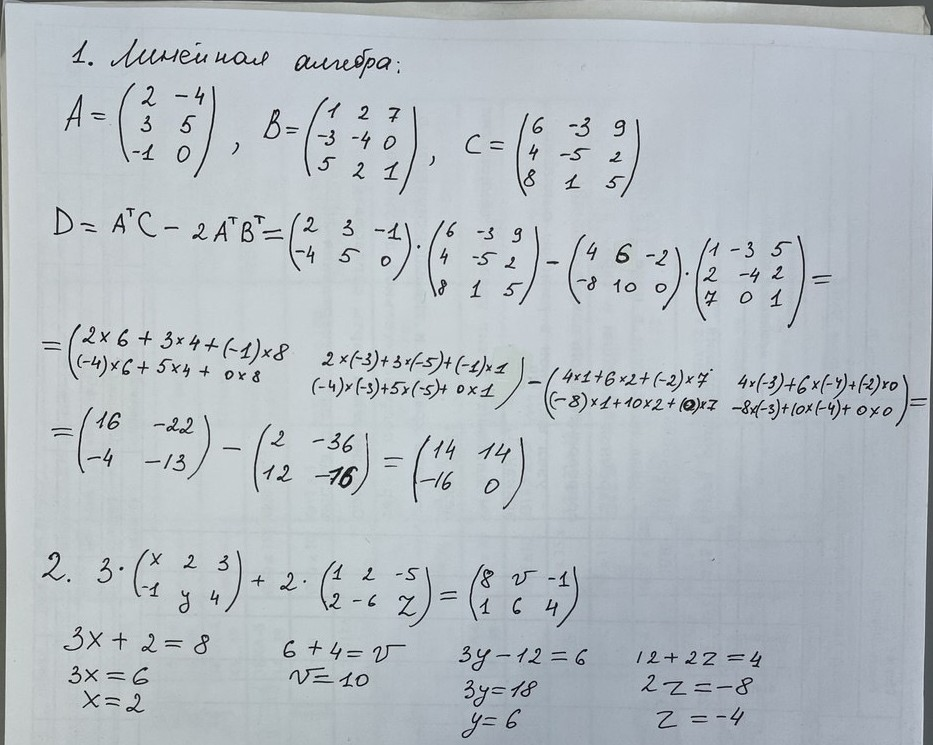

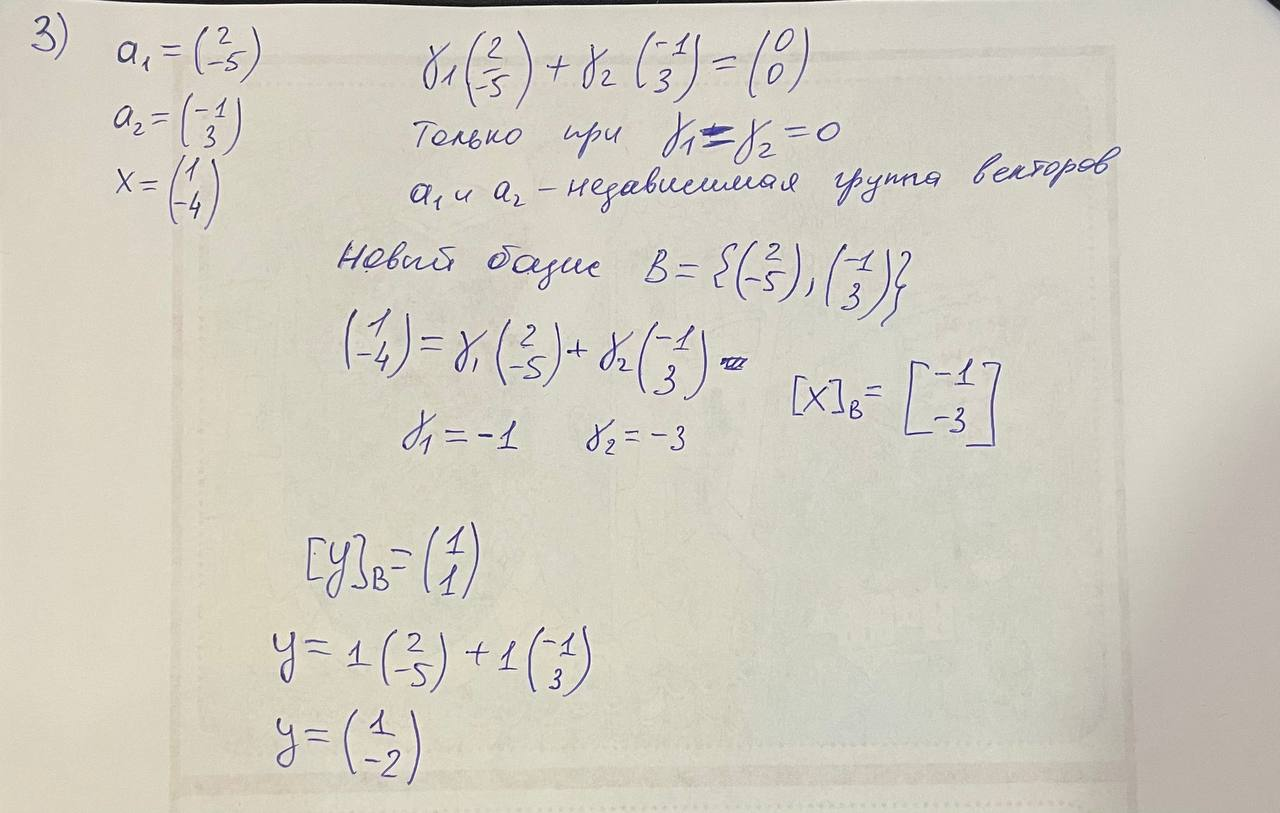

4. Исследовательское задание: малоранговая аппроксимация матрицы. Сгенерируйте случайную квадратную матрицу A ∈ R
n×n, n ≥ 100. Выполните сингулярное разложение этой матрицы, и получите три
матрицы: U, S, V
⊤. Выполняйте аппроксимацию матрицы A с рангом r, меняя его значение, например,
от 2 до n:
A˜ = U[:, : r]S[: r, : r]V
⊤[: r, :],
и каждый раз считайте ошибку апроксимации (как восстановленная матрица отличается от исходной):
E(r) = ||A − A˜||F =
vuut
Xn
i=1
Xn
j=1
(aij − a˜ij )**2
Используя библиотеку matplotlib, постройте график зависимости ошибки аппроксимации матрицы от
ранга r.

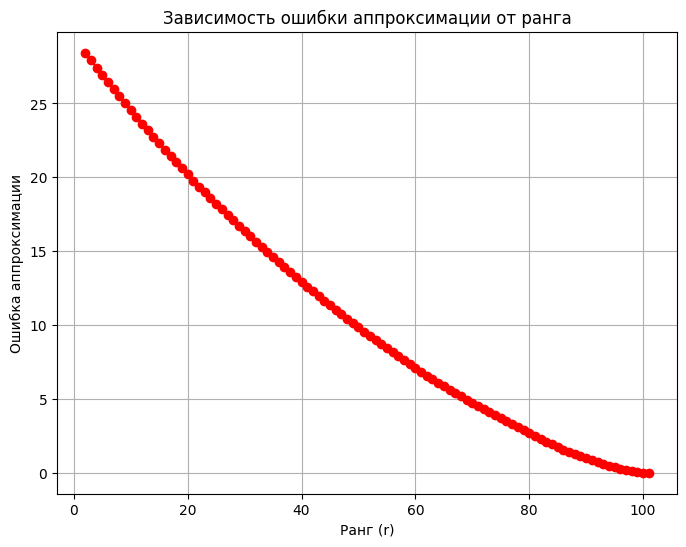

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def low_rank_approximation(A, rank):
    # Выполнение сингулярного разложения
    u, s, v_t = np.linalg.svd(A)

    # Аппроксимируем матрицу с заданным рангом
    u_r = u[:, :rank]
    s_r = np.diag(s[:rank])
    v_t_r = v_t[:rank, :]

    # Реконструкция приближённой матрицы
    a_r = u_r @ s_r @ v_t_r

    return a_r


def frobenius_norm_error(a, a_r):
    # Вычисление нормы ошибки
    error = np.linalg.norm(a - a_r, ord='fro')
    return error


# Размерность матрицы
n = 101

# Генерация случайной матрицы
a = np.random.rand(n, n)

# Ранг для аппроксимации
ranks = range(2, n + 1)
errors = []

for r in ranks:
    a_r = low_rank_approximation(a, r)
    error = frobenius_norm_error(a, a_r)
    errors.append(error)

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(ranks, errors, marker='o', linestyle='-', color='r')
plt.xlabel('Ранг (r)')
plt.ylabel('Ошибка аппроксимации')
plt.title('Зависимость ошибки аппроксимации от ранга')
plt.grid(True)
plt.show()

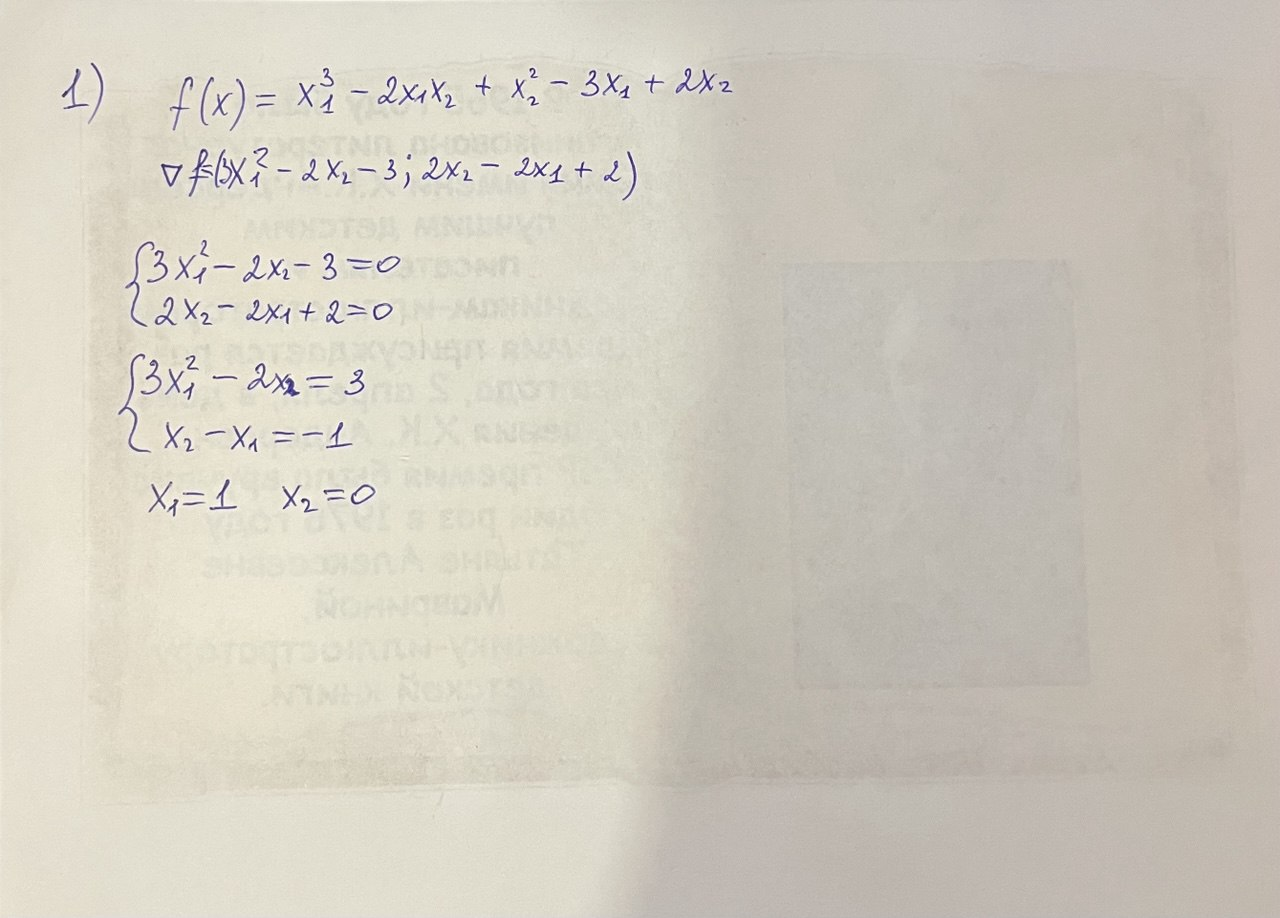

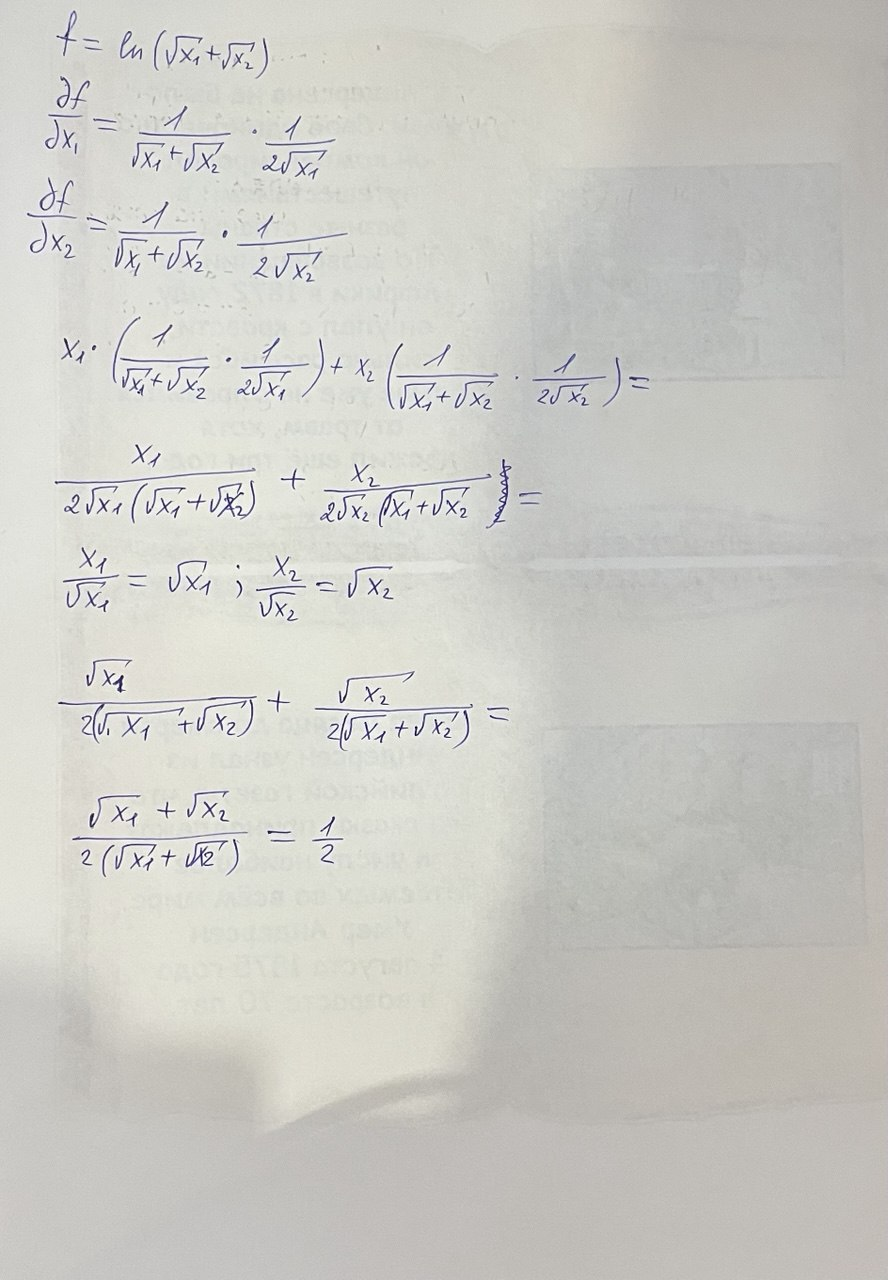

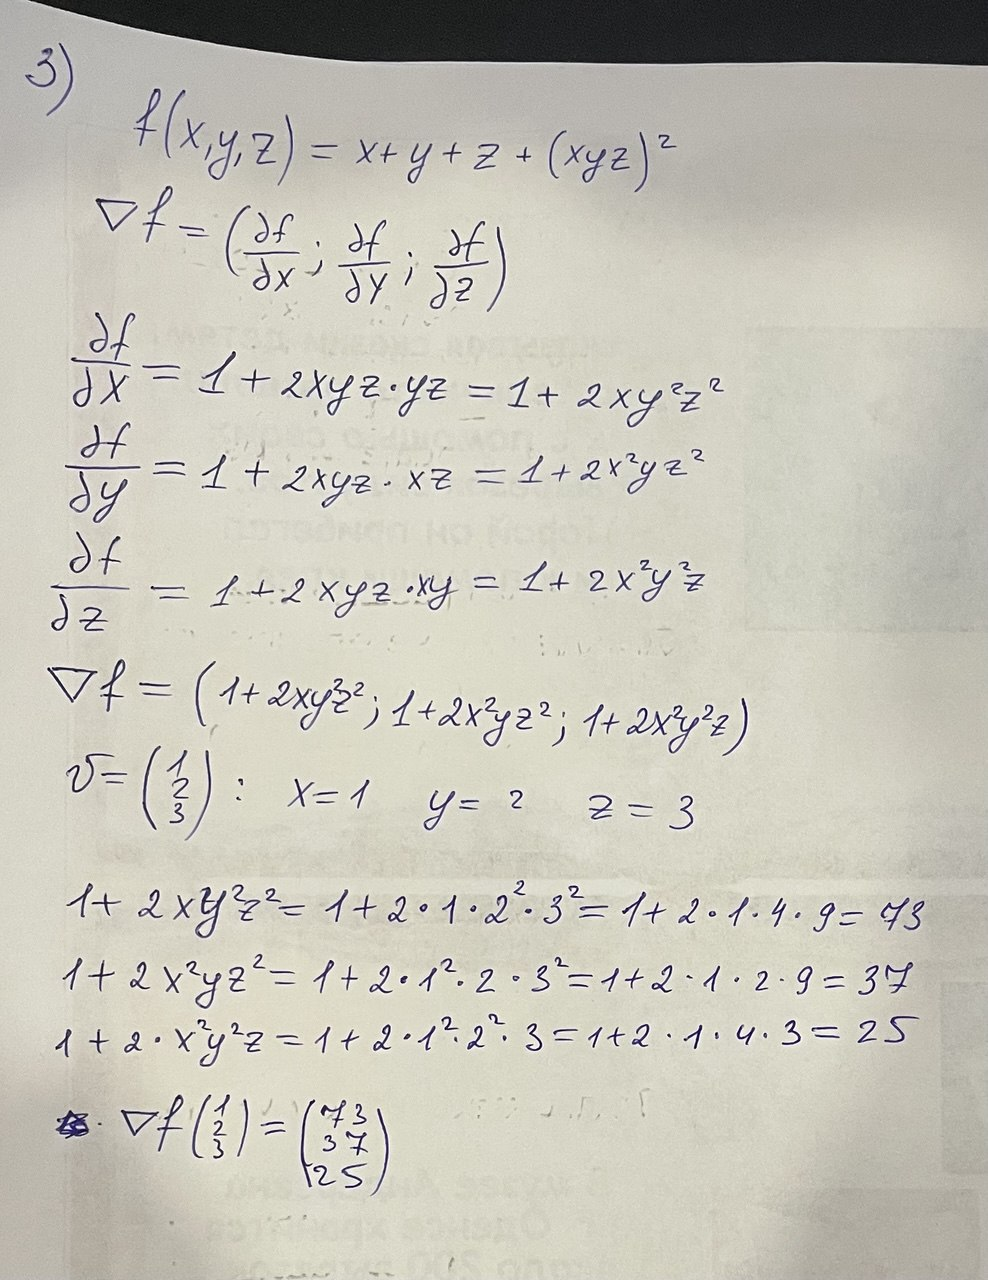

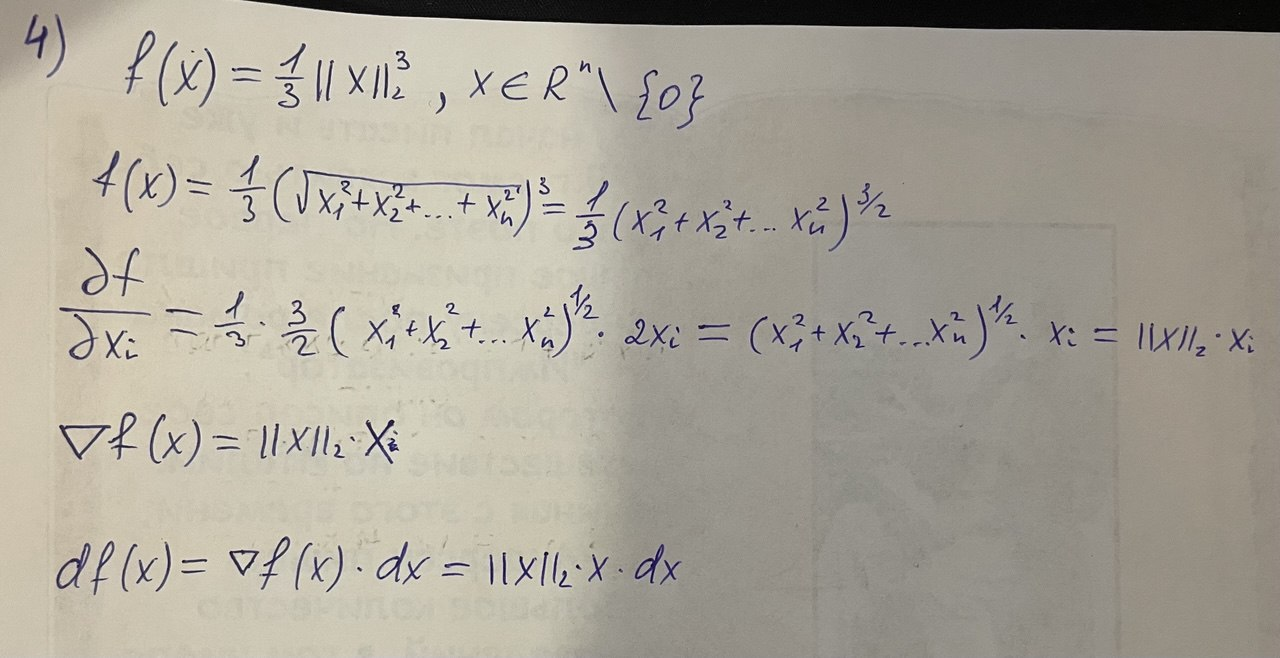

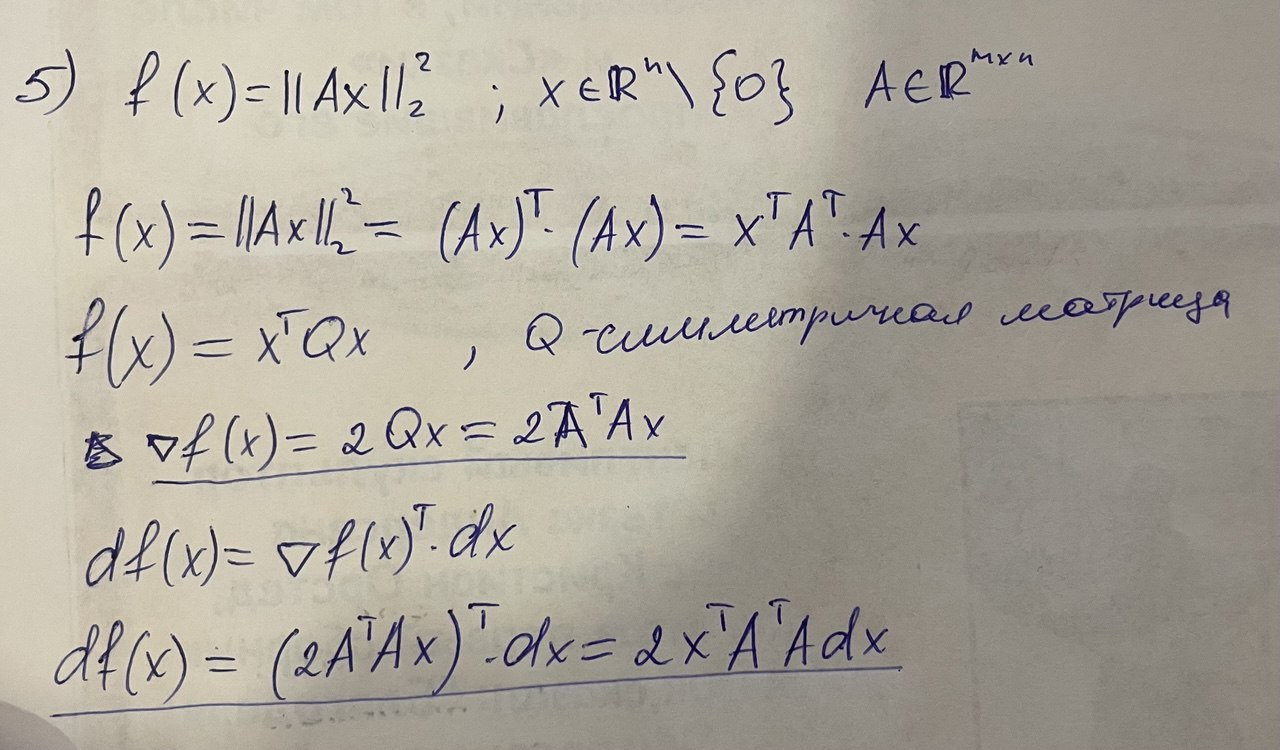